In [1]:
import os
import numpy as np
import tempfile
# import caffe
import caffe
caffe.set_mode_gpu()
caffe_root = "/home/gpu_user/corentin/flownet2/"
import sys
flush = sys.stdout.flush

### TESTS

In [9]:
caffe_root = "/home/gpu_user/corentin/flownet2/"
model_def = caffe_root + 'models/FlowNet2-s/train-all-layers/coco-fine-tune-all-layers.prototxt'
model_weights = caffe_root + 'models/FlowNet2-s/FlowNet2-s_weights.caffemodel'
assert os.path.exists(model_weights)
assert os.path.exists(model_def)

solver_filename = create_solver(model_def, test_net_path=model_def)
solver = caffe.get_solver(solver_filename)
solver.net.copy_from(model_weights)

In [10]:
solver.net.forward()


{'flow_loss2': array(11354.595703125, dtype=float32),
 'flow_loss3': array(2911.415283203125, dtype=float32),
 'flow_loss4': array(825.9181518554688, dtype=float32),
 'flow_loss5': array(253.66567993164062, dtype=float32),
 'flow_loss6': array(96.5174789428711, dtype=float32)}

In [12]:
imgs0t = solver.net.blobs["blob0"].data.copy()
imgs1t = solver.net.blobs["blob1"].data.copy()
flowst = solver.net.blobs["blob2"].data.copy()

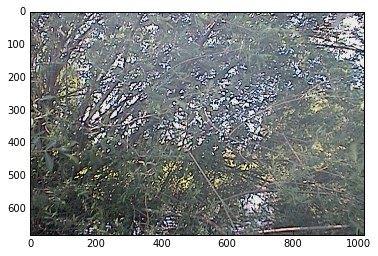

In [13]:
plt.imshow(deprocess_net_image(imgs0t[0]))

Show the images that are in lmdb as blobs

In [77]:
solver.net.forward()
imgs0 = solver.net.blobs["blob0"].data.copy()
imgs1 = solver.net.blobs["blob1"].data.copy()
flows = solver.net.blobs["blob2"].data.copy()

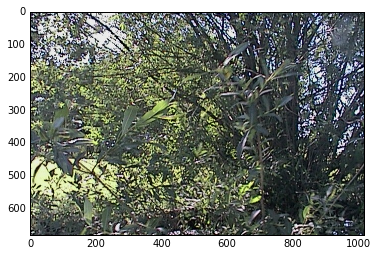

In [81]:
plt.imshow(deprocess_net_image(imgs0[0]))

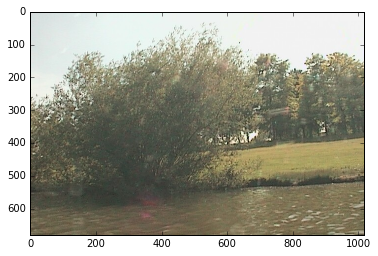

In [52]:
plt.imshow(deprocess_net_image(imgs0[0]))

In [21]:
niter = 1000  # number of iterations to train

print 'Running solvers for %d iterations...' % niter
solvers = [('pretrained', solver)]
loss, weights = run_solvers(niter, solvers)
print 'Done.'

train_loss = loss['pretrained']
weights = weights['pretrained']
# Delete solvers to save memory (no)

Running solvers for 1000 iterations...
  0) pretrained: loss=72277.492
 10) pretrained: loss=65641.258
 20) pretrained: loss=73247.852
 30) pretrained: loss=71794.062
 40) pretrained: loss=75782.422
 50) pretrained: loss=76310.672
 60) pretrained: loss=67999.773
 70) pretrained: loss=74307.906
 80) pretrained: loss=69258.148
 90) pretrained: loss=69616.289
100) pretrained: loss=70775.758
110) pretrained: loss=66132.477
120) pretrained: loss=63887.086
130) pretrained: loss=65879.766
140) pretrained: loss=68466.484
150) pretrained: loss=72203.094
160) pretrained: loss=68028.164
170) pretrained: loss=67651.312
180) pretrained: loss=67763.422
190) pretrained: loss=71509.234
200) pretrained: loss=69982.922
210) pretrained: loss=72472.500
220) pretrained: loss=72210.180
230) pretrained: loss=63505.742
240) pretrained: loss=67527.531
250) pretrained: loss=66961.844
260) pretrained: loss=67124.875
270) pretrained: loss=69958.609
280) pretrained: loss=68988.031
290) pretrained: loss=65506.141
3

#### Function to train the network, giving 

- prototxt path
- initial weights path
- output weights path
- number of iterations

In [7]:
def eval_net(prototxt, weights, test_iters=10):
    test_net = caffe.Net(prototxt, weights, caffe.TEST)
    loss = 0
    for it in xrange(test_iters):
        loss += test_net.forward()['flow_loss2']
    loss /= test_iters
    return test_net, loss

import sys
sys.path.append("OpticalFlowToolkit/")
from lib.flowlib import read_flow, show_flow 

In [8]:
from run_model import run_model

## MODEL 200,000 iterations, fine-tune last layer

In [ ]:
eval_net(prototxt, output_weights, test_iters=10)

### Test on an image

In [20]:
deploy_model = "/home/gpu_user/corentin/flownet2/models/FlowNet2-s/FlowNet2-s_deploy.prototxt.template"
img0 = "/home/gpu_user/corentin/testing_set/0010-1.ppm"
img1 = "/home/gpu_user/corentin/testing_set/0010-2.ppm"
real_flow = "/home/gpu_user/corentin/testing_set/0010.flo"
estimated_flow_ft = "/home/gpu_user/corentin/testing_set/0010-estimated.flo"
estimated_flow_ori = "/home/gpu_user/corentin/testing_set/0010-estimated-ori.flo"

run_model(deploy_model, output_weights, img0, img1, estimated_flow_ft)
run_model(deploy_model, previous_weights, img0, img1, estimated_flow_ori)

Network forward pass using /home/gpu_user/corentin/flownet2/models/FlowNet2-s/coco-weights-3.caffemodel.
Succeeded.
Network forward pass using /home/gpu_user/corentin/flownet2/models/FlowNet2-s/coco-FlowNet2-s_weights.caffemodel.
Succeeded.


Reading 680 x 1016 flow file in .flo format
max flow: 26.4416
flow range:
u = -26.014 .. 9.402
v = -8.538 .. 11.009


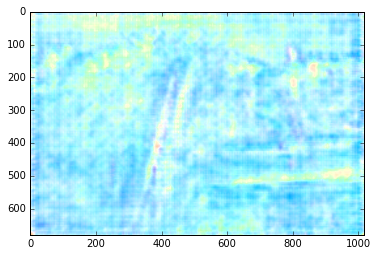

Reading 680 x 1016 flow file in .flo format
max flow: 64.8573
flow range:
u = 29.394 .. 50.302
v = 29.655 .. 47.504


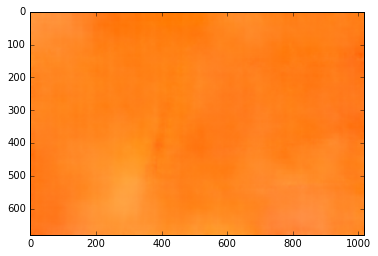

In [25]:
show_flow(estimated_flow_ft)
show_flow(estimated_flow_ori)

In [ ]:
from tools import 

 ## TEST on 100,000 iterations with all layers

In [10]:
prototxt = caffe_root + "/models/FlowNet2-s/coco-fine-tune-all-layers.prototxt"
previous_weights = caffe_root + '/models/FlowNet2-s/coco-FlowNet2-s_weights.caffemodel'
output_weights =  caffe_root + "/models/FlowNet2-s/coco-weights-full-train.caffemodel"

In [ ]:
_, loss, test_loss = train(prototxt, previous_weights, caffe_root + "/models/FlowNet2-s/coco-weights-full-train.caffemodel", 
                           iterations=100000, disp_interval=20,
                          log_file=caffe_root + "/models/FlowNet2-s/full-train-logs")

Loading net and solver
Starting training
  0) solver: loss=68555.95, test_loss=50671.85
 20) solver: loss=43106.33, test_loss=41632.33
 40) solver: loss=35203.55, test_loss=33921.48


## Test that the flow is in the right direction for training set

In [1]:
from tools import test_model_on_image_pair
from run_model import run_model

deploy_model = "/home/gpu_user/corentin/flownet2/models/FlowNet2-s/FlowNet2-s_deploy.prototxt.template"
img0 = "/home/gpu_user/corentin/training_set3/0743-1.ppm"
img1 = "/home/gpu_user/corentin/training_set3/0743-2.ppm"
real_flow = "/home/gpu_user/corentin/training_set3/0743.flo"
weights = "/home/gpu_user/corentin/flownet2/models/FlowNet2-s/FlowNet2-s_weights.caffemodel"
estimated_flow_ori = "/home/gpu_user/corentin/training_set3/0743-esti.flo"

run_model(deploy_model, weights, img0, img1, estimated_flow_ori)

BaseException: img0 does not exist: /home/gpu_user/corentin/training_set3/0743-1.ppm

In [7]:
from tools import open_flow, show_image
from lib.flowlib import show_flow

Reading 680 x 1016 flow file in .flo format
Reading 680 x 1016 flow file in .flo format
Reading 680 x 1016 flow file in .flo format
max flow: 70.1731
flow range:
u = -53.725 .. -34.979
v = 31.240 .. 50.904


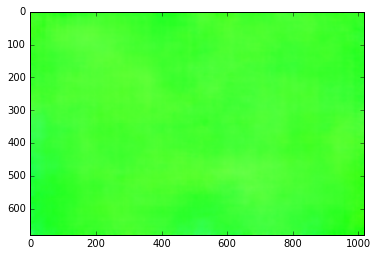

In [11]:
%matplotlib inline
est_flow = open_flow(estimated_flow_ori)
flow = open_flow(real_flow)
show_flow(estimated_flow_ori)

Reading 680 x 1016 flow file in .flo format
max flow: 3.0625
flow range:
u = 0.000 .. 0.000
v = -3.062 .. 3.062


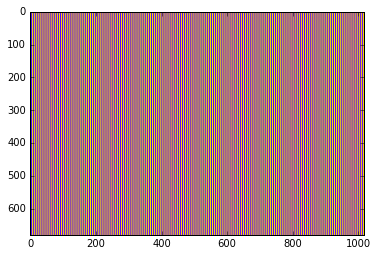

In [13]:
show_flow(real_flow)

In [17]:
est_flow

array([[[-37.26445007,  40.46367264],
        [-37.26445007,  40.46367264],
        [-38.13428497,  40.76357651],
        ..., 
        [-39.46842957,  32.36326981],
        [-38.36823654,  31.24013329],
        [-38.36823654,  31.24013329]],

       [[-37.26445007,  40.46367264],
        [-37.26445007,  40.46367264],
        [-38.13428497,  40.76357269],
        ..., 
        [-39.46842575,  32.36326981],
        [-38.36823654,  31.24013329],
        [-38.36823654,  31.24013329]],

       [[-37.95022202,  40.88269043],
        [-37.95022202,  40.88269043],
        [-38.75901031,  41.17092514],
        ..., 
        [-40.73813248,  33.33695221],
        [-39.75326157,  32.25570679],
        [-39.75325775,  32.25570679]],

       ..., 
       [[-43.19051743,  33.0267334 ],
        [-43.19051743,  33.0267334 ],
        [-43.19511032,  33.07156754],
        ..., 
        [-47.17097855,  40.09049606],
        [-46.90151596,  39.50254822],
        [-46.90151978,  39.50254822]],

       [[-4

In [22]:
from tools import generate_two_images_and_flow
import cv2

In [23]:
img1, img2, flow = generate_two_images_and_flow(cv2.imread(img0), 30, 30)

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((650, 986), 30) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [26]:
from lib.flowlib import write_flow

In [27]:
write_flow(flow, "/tmp/test.flo")

In [30]:
import run_model